In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/reliance-stocks-data/RELIANCE.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[15,6]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/reliance-stocks-data/RELIANCE.csv')
df.head()

,Date,Open,High,Low,Close
0,1996-01-01 00:00:00+05:30,10.403050,10.458871,10.334541,10.441110
1,1996-01-02 00:00:00+05:30,10.415735,10.466482,10.283794,10.359914
2,1996-01-03 00:00:00+05:30,10.529916,11.009471,10.415736,10.438572
3,1996-01-04 00:00:00+05:30,10.339614,10.372600,10.202599,10.342152
4,1996-01-05 00:00:00+05:30,10.301558,10.301558,10.182303,10.271110


In [4]:
df.shape

(6948, 5)

In [5]:
6948*0.3

2084.4

In [6]:
6948-2084

4864

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6948 non-null   object 
 1   Open    6948 non-null   float64
 2   High    6948 non-null   float64
 3   Low     6948 non-null   float64
 4   Close   6948 non-null   float64
dtypes: float64(4), object(1)
memory usage: 271.5+ KB


# Visualising the data

In [8]:
df1=df.copy()
df1.head()

,Date,Open,High,Low,Close
0,1996-01-01 00:00:00+05:30,10.403050,10.458871,10.334541,10.441110
1,1996-01-02 00:00:00+05:30,10.415735,10.466482,10.283794,10.359914
2,1996-01-03 00:00:00+05:30,10.529916,11.009471,10.415736,10.438572
3,1996-01-04 00:00:00+05:30,10.339614,10.372600,10.202599,10.342152
4,1996-01-05 00:00:00+05:30,10.301558,10.301558,10.182303,10.271110


In [9]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype                                
---  ------  --------------  -----                                
 0   Date    6948 non-null   datetime64[ns, pytz.FixedOffset(330)]
 1   Open    6948 non-null   float64                              
 2   High    6948 non-null   float64                              
 3   Low     6948 non-null   float64                              
 4   Close   6948 non-null   float64                              
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), float64(4)
memory usage: 271.5 KB


In [10]:
df1.set_index('Date',inplace=True)

In [11]:
df1.head()

,Open,High,Low,Close
Date,,,,
1996-01-01 00:00:00+05:30,10.403050,10.458871,10.334541,10.441110
1996-01-02 00:00:00+05:30,10.415735,10.466482,10.283794,10.359914
1996-01-03 00:00:00+05:30,10.529916,11.009471,10.415736,10.438572
1996-01-04 00:00:00+05:30,10.339614,10.372600,10.202599,10.342152
1996-01-05 00:00:00+05:30,10.301558,10.301558,10.182303,10.271110


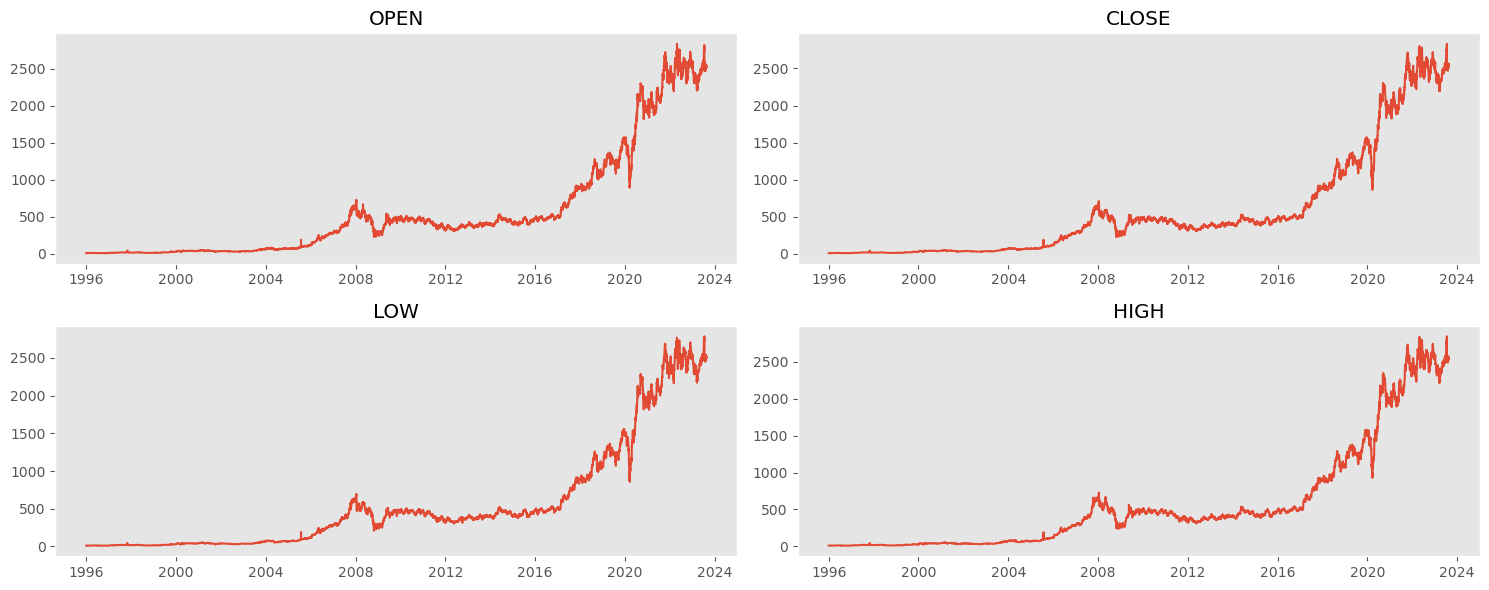

In [12]:
plt.subplot(2,2,1)
plt.plot(df1['Open'])
plt.title('OPEN')
plt.grid()

plt.subplot(2,2,2)
plt.plot(df1['Close'])
plt.title('CLOSE')
plt.grid()

plt.subplot(2,2,3)
plt.plot(df1['Low'])
plt.title('LOW')
plt.grid()

plt.subplot(2,2,4)
plt.plot(df1['High'])
plt.title('HIGH')
plt.grid()

plt.tight_layout()
plt.show()

# Analysis

In [13]:
df.head()

,Date,Open,High,Low,Close
0,1996-01-01 00:00:00+05:30,10.403050,10.458871,10.334541,10.441110
1,1996-01-02 00:00:00+05:30,10.415735,10.466482,10.283794,10.359914
2,1996-01-03 00:00:00+05:30,10.529916,11.009471,10.415736,10.438572
3,1996-01-04 00:00:00+05:30,10.339614,10.372600,10.202599,10.342152
4,1996-01-05 00:00:00+05:30,10.301558,10.301558,10.182303,10.271110


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
train=df.iloc[0:4864,:]
test=df.iloc[4864:,:]

In [16]:
train.shape

(4864, 5)

In [17]:
test.shape

(2084, 5)

In [18]:
xtrain=pd.to_datetime(train['Date'])
ytrain=train['Close'].values.reshape(-1,1)

In [19]:
xtest=pd.to_datetime(test['Date'])
ytest=test['Close'].values.reshape(-1,1)

In [20]:
lr=LinearRegression()
lr_model=lr.fit(xtrain.values.reshape(-1,1),ytrain)
lr_model

LinearRegression()

In [21]:
ypred = lr_model.predict(xtest.values.astype('float').reshape(-1,1))
ypred

array([[500.0648559 ],
       [500.14750737],
       [500.23015883],
       ...,
       [754.30076489],
       [754.54871929],
       [754.63137076]])

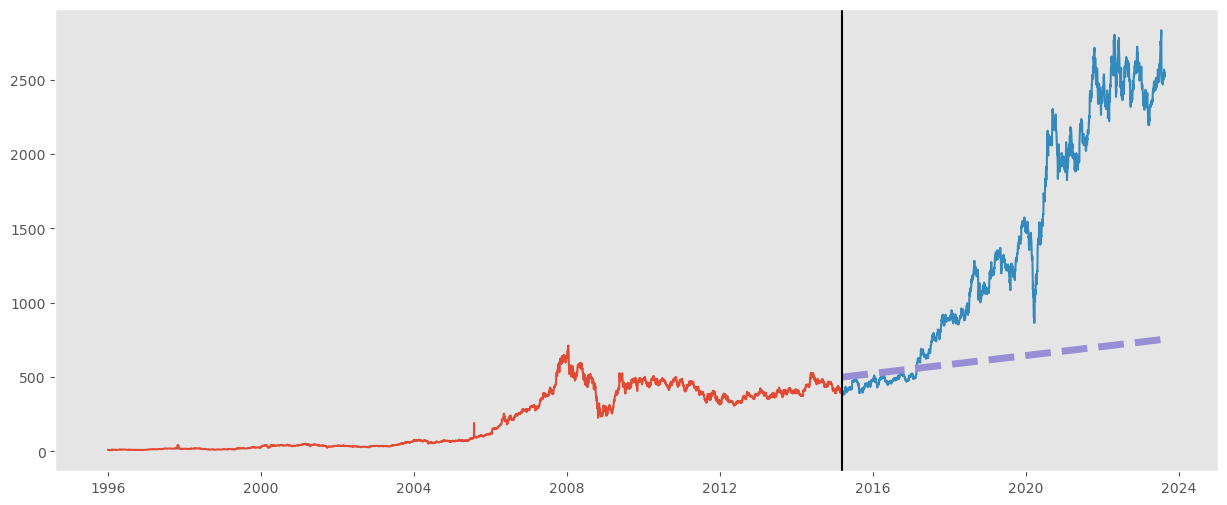

In [22]:
plt.plot(xtrain,ytrain)
plt.plot(xtest,ytest)
plt.plot(xtest,ypred,linewidth=5,linestyle='--')
plt.axvline(xtrain.tail().values[1],color='k')
plt.grid()
plt.show()

# NEW

In [23]:
df=pd.read_csv('/kaggle/input/reliance-stocks-data/RELIANCE.csv')
df.head()

,Date,Open,High,Low,Close
0,1996-01-01 00:00:00+05:30,10.403050,10.458871,10.334541,10.441110
1,1996-01-02 00:00:00+05:30,10.415735,10.466482,10.283794,10.359914
2,1996-01-03 00:00:00+05:30,10.529916,11.009471,10.415736,10.438572
3,1996-01-04 00:00:00+05:30,10.339614,10.372600,10.202599,10.342152
4,1996-01-05 00:00:00+05:30,10.301558,10.301558,10.182303,10.271110


In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [25]:
for lag in range(1, 6):
    df[f'lag_{lag}'] = df['Close'].shift(lag)

In [26]:
df.head()

,Open,High,Low,Close,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,
1996-01-01 00:00:00+05:30,10.403050,10.458871,10.334541,10.441110,NaN,NaN,NaN,NaN,NaN
1996-01-02 00:00:00+05:30,10.415735,10.466482,10.283794,10.359914,10.441110,NaN,NaN,NaN,NaN
1996-01-03 00:00:00+05:30,10.529916,11.009471,10.415736,10.438572,10.359914,10.441110,NaN,NaN,NaN
1996-01-04 00:00:00+05:30,10.339614,10.372600,10.202599,10.342152,10.438572,10.359914,10.441110,NaN,NaN
1996-01-05 00:00:00+05:30,10.301558,10.301558,10.182303,10.271110,10.342152,10.438572,10.359914,10.44111,NaN


In [27]:
df.dropna(inplace=True)


In [28]:
x = df[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = df['Close']

In [29]:
import statsmodels.api as sm

In [30]:
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.722e+06
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        07:18:52   Log-Likelihood:                -29154.
No. Observations:                6943   AIC:                         5.832e+04
Df Residuals:                    6937   BIC:                         5.836e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2207      0.247      0.894      0.3

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=False)


In [33]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [34]:
ypred = lr.predict(xtest)
ypred

array([ 891.96995393,  896.92155296,  909.10094062, ..., 2527.08547834,
       2547.90842803, 2523.11192753])

In [35]:
from sklearn.metrics import mean_squared_error,r2_score
score = r2_score(ytest,ypred)
print(f'R2-Score: {score}')
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print(f'Root Mean Squared Error: {rmse}')

R2-Score: 0.996921571251116
Root Mean Squared Error: 33.36530046267764


In [36]:
ypred

array([ 891.96995393,  896.92155296,  909.10094062, ..., 2527.08547834,
       2547.90842803, 2523.11192753])